In [1]:
library(foreign) # library for importing sav file (SPSS) into R.

In [2]:
dataset = read.spss("Bodyfat.sav", to.data.frame=TRUE)

In [3]:
str(dataset)

'data.frame':	252 obs. of  18 variables:
 $ Case      : num  1 2 3 4 5 6 7 8 9 10 ...
 $ PctBodyFat: num  12.3 6.1 25.3 10.4 28.7 20.9 19.2 12.4 4.1 11.7 ...
 $ Density   : num  1.07 1.09 1.04 1.08 1.03 ...
 $ Age       : num  23 22 22 26 24 24 26 25 25 23 ...
 $ Weight    : num  154 173 154 185 184 ...
 $ Height    : num  67.8 72.2 66.2 72.2 71.2 ...
 $ Adioposity: num  23.7 23.4 24.7 24.9 25.6 26.5 26.2 23.6 24.6 25.8 ...
 $ FatFreeWt : num  135 161 116 165 133 ...
 $ Neck      : num  36.2 38.5 34 37.4 34.4 39 36.4 37.8 38.1 42.1 ...
 $ Chest     : num  93.1 93.6 95.8 101.8 97.3 ...
 $ Abdomen   : num  85.2 83 87.9 86.4 100 94.4 90.7 88.5 82.5 88.6 ...
 $ Hip       : num  94.5 98.7 99.2 101.2 101.9 ...
 $ Thigh     : num  59 58.7 59.6 60.1 63.2 66 58.4 60 62.9 63.1 ...
 $ Knee      : num  37.3 37.3 38.9 37.3 42.2 42 38.3 39.4 38.3 41.7 ...
 $ Ankle     : num  21.9 23.4 24 22.8 24 25.6 22.9 23.2 23.8 25 ...
 $ Biceps    : num  32 30.5 28.8 32.4 32.2 35.7 31.9 30.5 35.9 35.6 ...
 $ For

In [4]:
# variables we wish to look at 
variables <- c("Age", "Weight", "Height", "Neck", "Chest", "Abdomen", "Hip", "Thigh", "Knee", "Ankle", "Biceps", "Forearm", "Wrist")

In [5]:
fitted_model <- lm(PctBodyFat ~ Age, dataset)

In [6]:
anova(fitted_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,1493.30,1493.30042,23.20852,2.522101e-06
Residuals,250,16085.69,64.34276,NA,NA


In [7]:
# p-value shows that age definitely has a correlation with % bodyfat

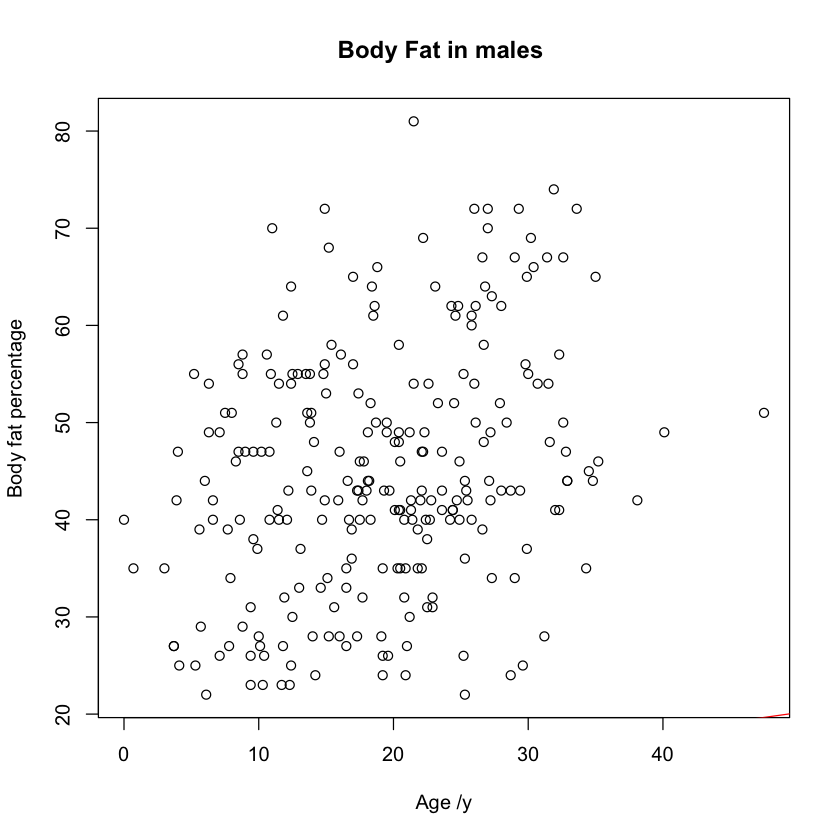

In [8]:
plot(dataset$PctBodyFat, dataset$Age, main="Body Fat in males ", xlab="Age /y", ylab='Body fat percentage')
abline(fitted_model, col='red')

In [9]:
# Weight

In [10]:
fitted_model_weight <- lm(PctBodyFat ~ Weight, dataset)

In [11]:
anova(fitted_model_weight)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Weight,1,6593.016,6593.01614,150.0326,2.473116e-27
Residuals,250,10985.974,43.94389,NA,NA


In [12]:
# p-value shows that weight definitely has a correlation with % bodyfat

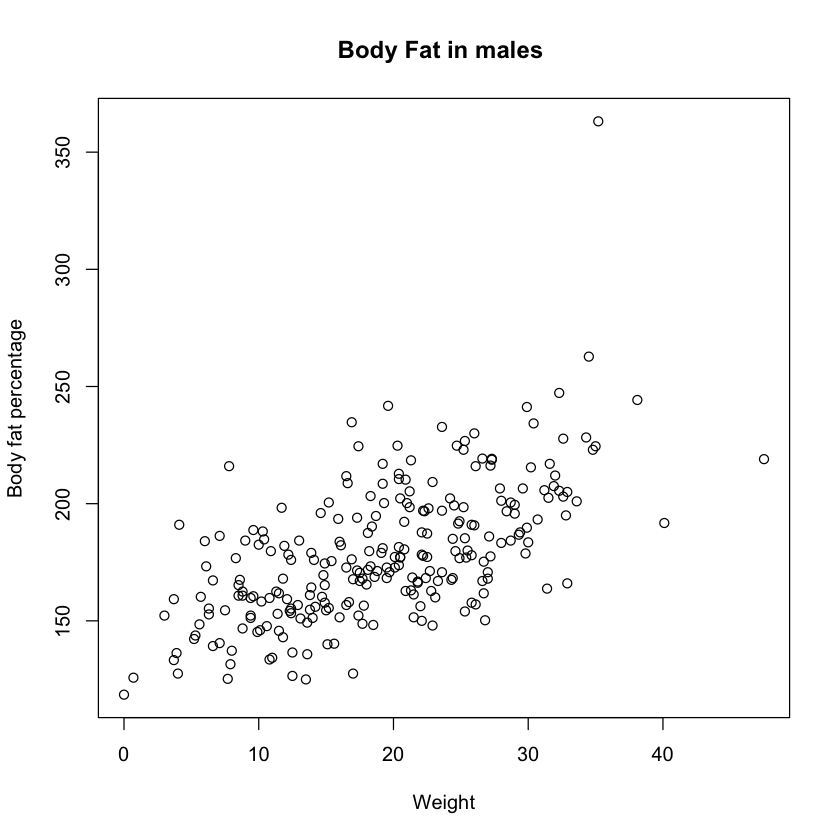

In [13]:
plot(dataset$PctBodyFat, dataset$Weight, main="Body Fat in males ", xlab="Weight", ylab='Body fat percentage')
abline(fitted_model_weight, col='red')

In [14]:
# Height

In [15]:
fitted_model_height <- lm(PctBodyFat ~ Height, dataset)

In [16]:
anova(fitted_model_height)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Height,1,11.24042,11.24042,0.1599582,0.6895365
Residuals,250,17567.74942,70.27100,NA,NA


In [ ]:
# p-value shows that height does not have a significant correlation with % body fat

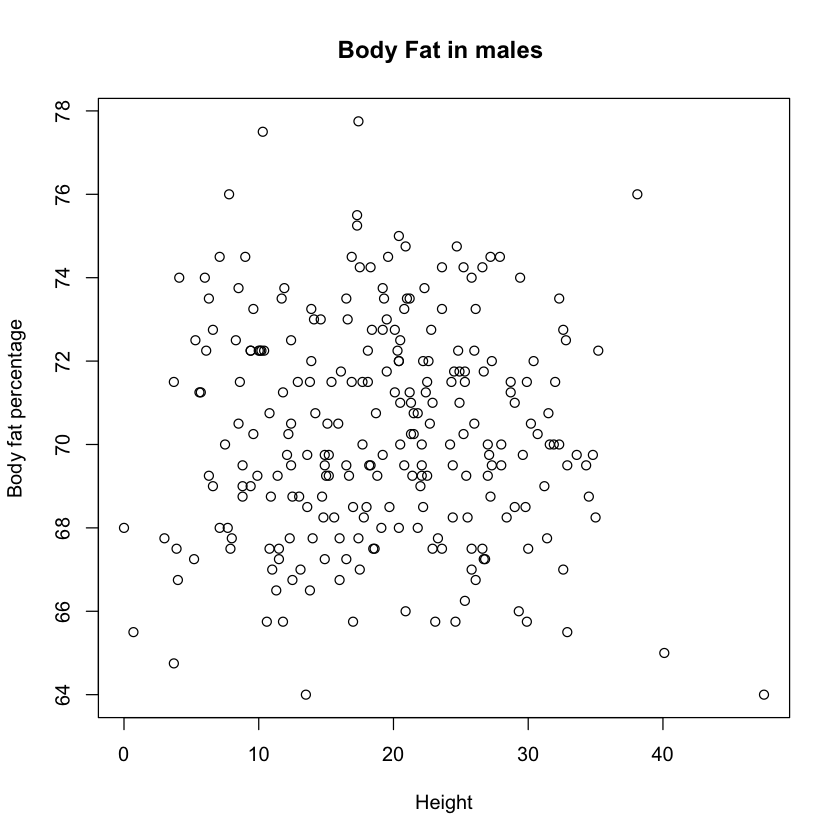

In [17]:
plot(dataset$PctBodyFat, dataset$Height, main="Body Fat in males ", xlab="Height", ylab='Body fat percentage')
abline(fitted_model_height, col='red')

In [ ]:
# Neck

In [18]:
fitted_model_neck <- lm(PctBodyFat ~ Neck, dataset)

In [19]:
anova(fitted_model_neck)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Neck,1,4230.918,4230.91772,79.24211,1.147139e-16
Residuals,250,13348.072,53.39229,NA,NA


In [30]:
# The p-value shows there is a high correlation between Neck and % body fat

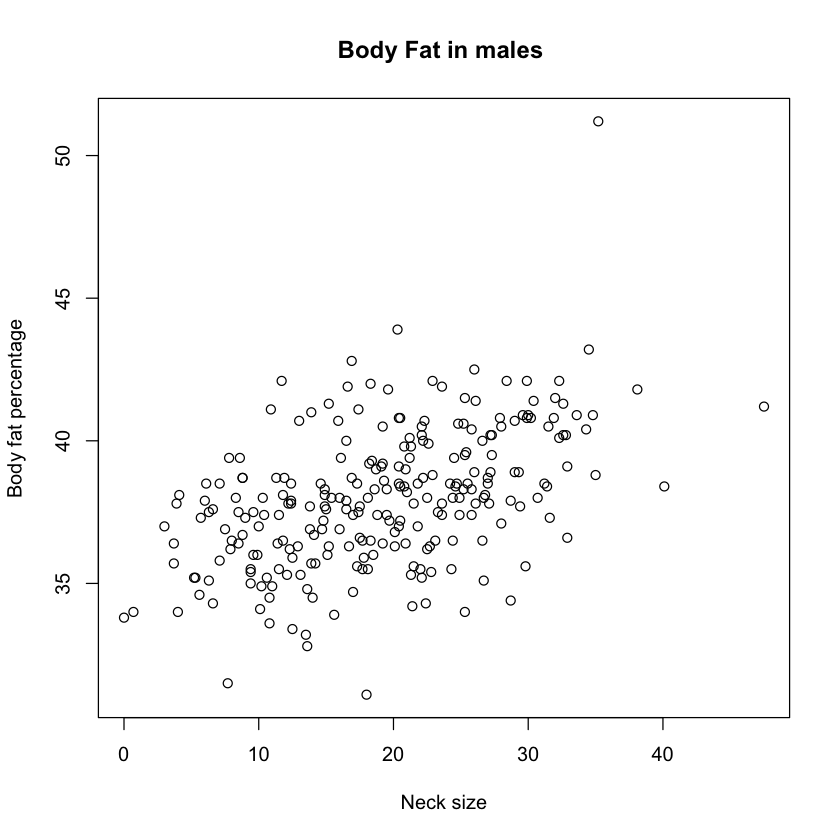

In [36]:
plot(dataset$PctBodyFat, dataset$Neck, main="Body Fat in males ", xlab="Neck size", ylab='Body fat percentage')
abline(fitted_model_height, col='red')

In [ ]:
# Chest

In [37]:
fitted_model_chest <- lm(PctBodyFat ~ Chest, dataset)

In [38]:
anova(fitted_model_chest)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Chest,1,8678.314,8678.3138,243.7543,8.085369e-39
Residuals,250,8900.676,35.6027,NA,NA


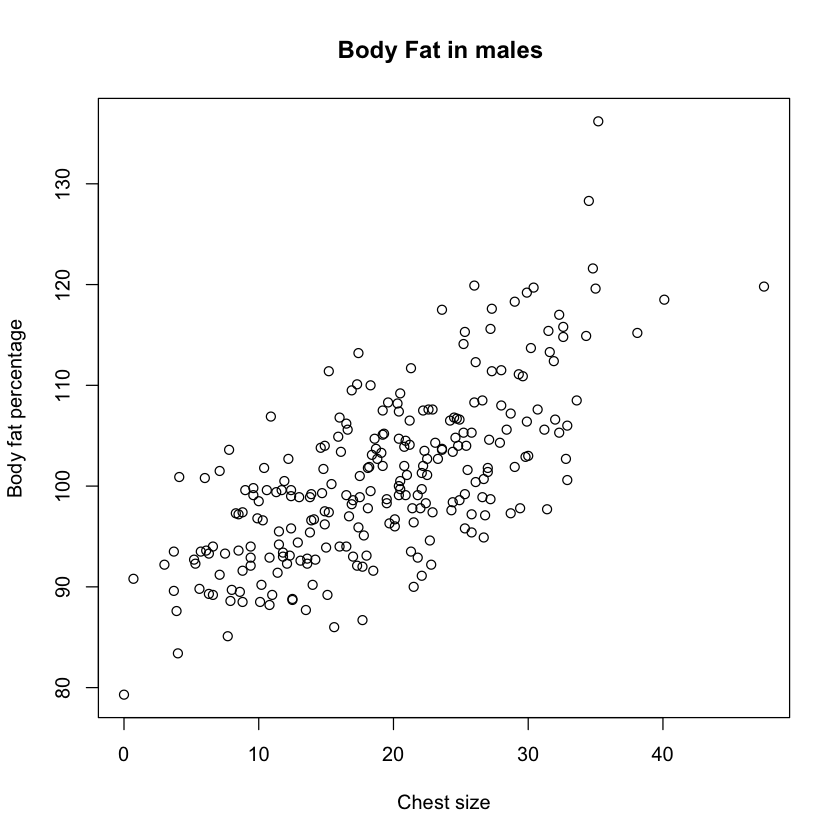

In [39]:
plot(dataset$PctBodyFat, dataset$Chest, main="Body Fat in males ", xlab="Chest size", ylab='Body fat percentage')
abline(fitted_model_height, col='red')

In [ ]:
# The graph and the p-value show that chest size is correlated with body fat %

In [ ]:
# Abdomen

In [40]:
fitted_model_abdomen <- lm(PctBodyFat ~ Abdomen, dataset)

In [41]:
anova(fitted_model_abdomen)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Abdomen,1,11631.527,11631.52681,488.9281,9.090067e-61
Residuals,250,5947.463,23.78985,NA,NA


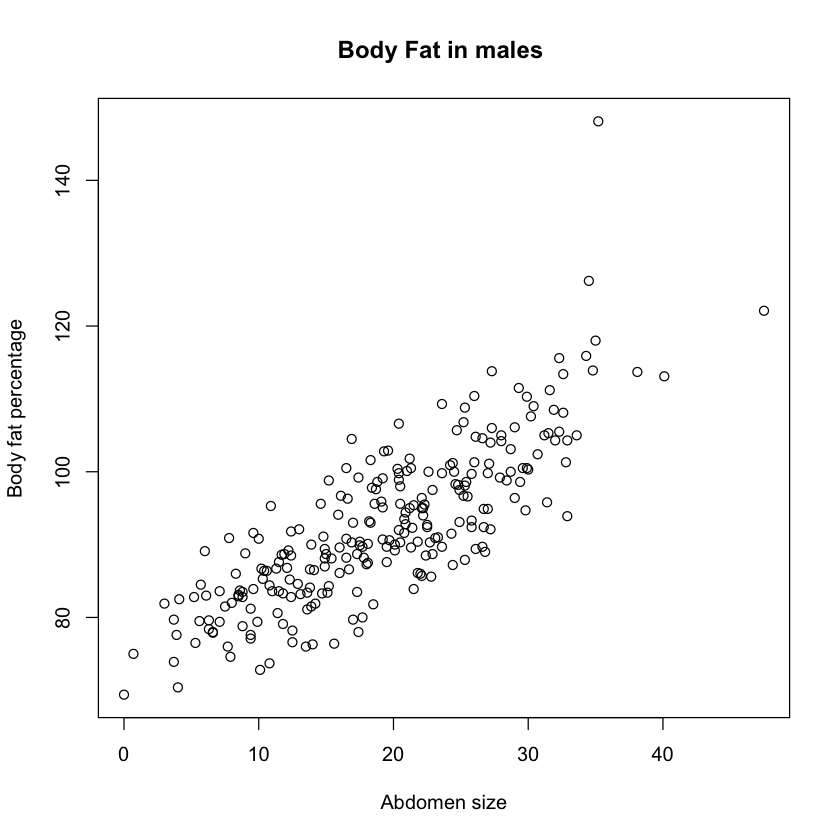

In [42]:
plot(dataset$PctBodyFat, dataset$Abdomen, main="Body Fat in males ", xlab="Abdomen size", ylab='Body fat percentage')
abline(fitted_model_height, col='red')

In [ ]:
# The graph and the p-value shows that abdomen size is correlated with % body fat

In [ ]:
# Hip

In [43]:
fitted_model_hip <- lm(PctBodyFat ~ Hip, dataset)

In [44]:
anova(fitted_model_hip)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Hip,1,6871.209,6871.20852,160.4256,9.81901e-29
Residuals,250,10707.781,42.83113,NA,NA


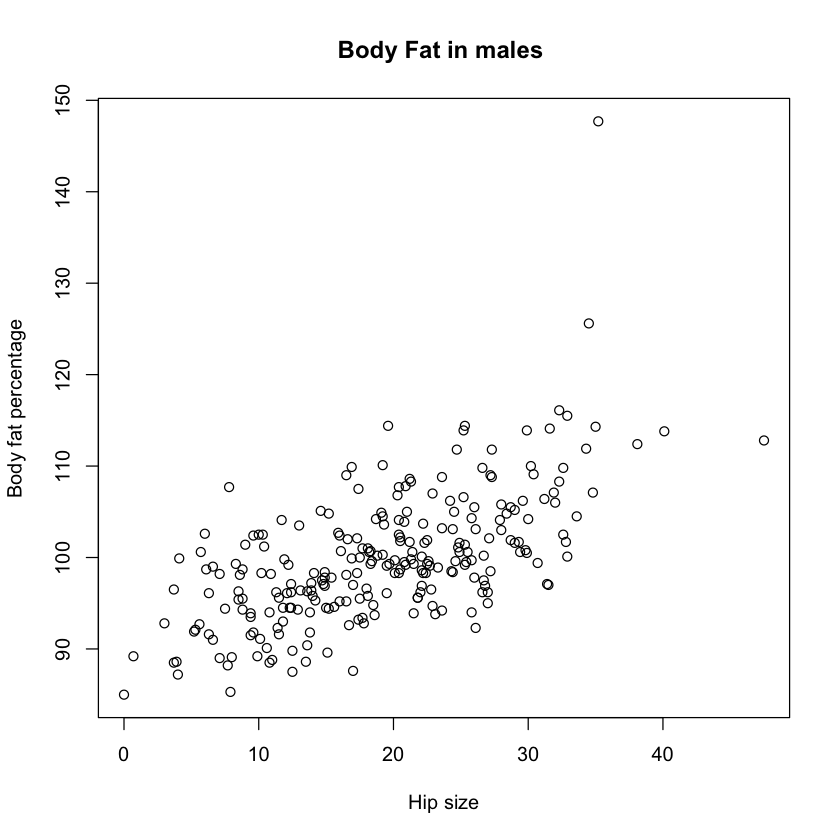

In [45]:
plot(dataset$PctBodyFat, dataset$Hip, main="Body Fat in males ", xlab="Hip size", ylab='Body fat percentage')
abline(fitted_model_height, col='red')

In [63]:
# Thigh

In [64]:
fitted_model_thigh <- lm(PctBodyFat ~ Thigh, dataset)

In [65]:
anova(fitted_model_thigh)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Thigh,1,5505.047,5505.04683,113.9861,3.612862e-22
Residuals,250,12073.943,48.29577,NA,NA


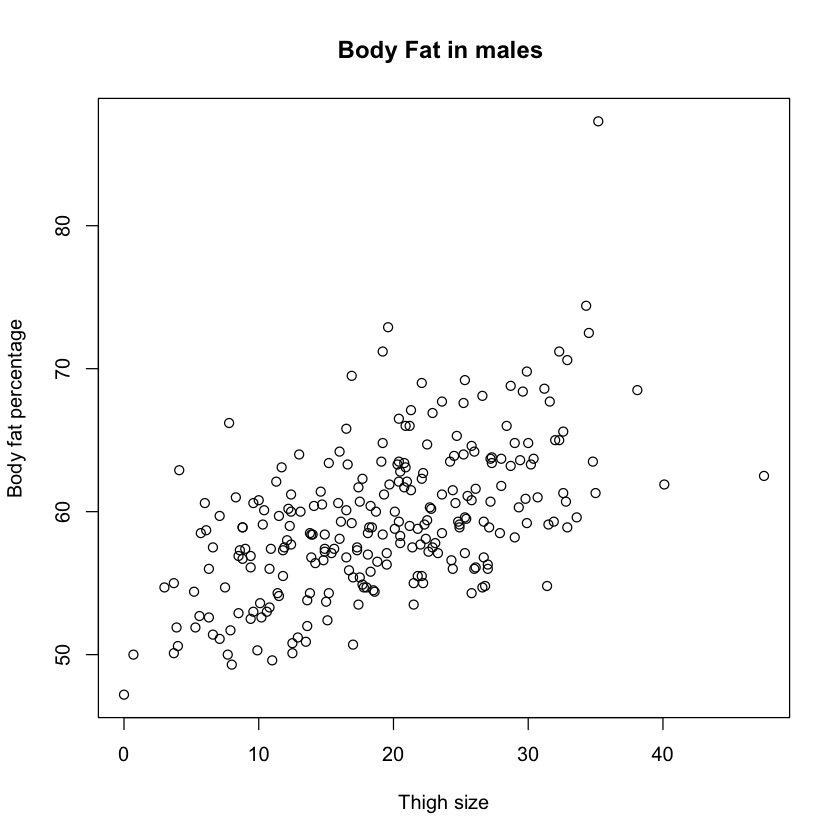

In [69]:
plot(dataset$PctBodyFat, dataset$Thigh, main="Body Fat in males ", xlab="Thigh size", ylab='Body fat percentage')

In [70]:
# The graph and the p-value show that hip size is correlated with % body fat

In [71]:
# Knee

In [72]:
fitted_model_knee <- lm(PctBodyFat ~ Knee, dataset)

In [73]:
anova(fitted_model_knee)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Knee,1,4548.394,4548.39362,87.26373,5.465059e-18
Residuals,250,13030.596,52.12238,NA,NA


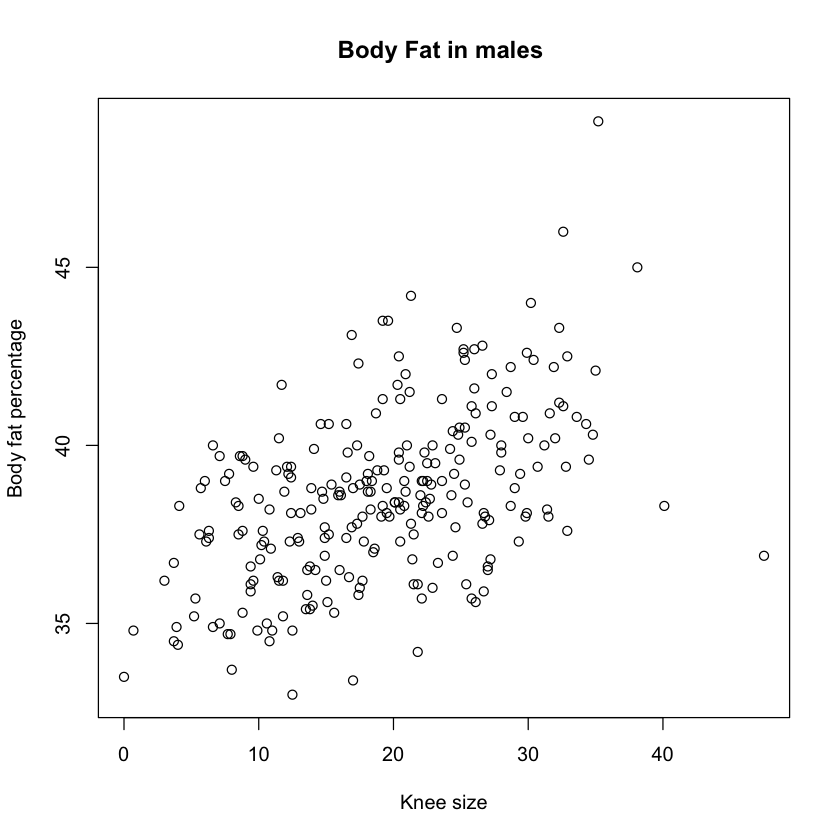

In [74]:
plot(dataset$PctBodyFat, dataset$Knee, main="Body Fat in males ", xlab="Knee size", ylab='Body fat percentage')

In [ ]:
# The graph and the p-value shows that Knee size is correlated with % bodyfat

In [ ]:
#  Ankle

In [75]:
fitted_model_ankle <- lm(PctBodyFat ~ Ankle, dataset)

In [76]:
anova(fitted_model_ankle)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Ankle,1,1243.536,1243.53631,19.03125,1.881895e-05
Residuals,250,16335.454,65.34181,NA,NA


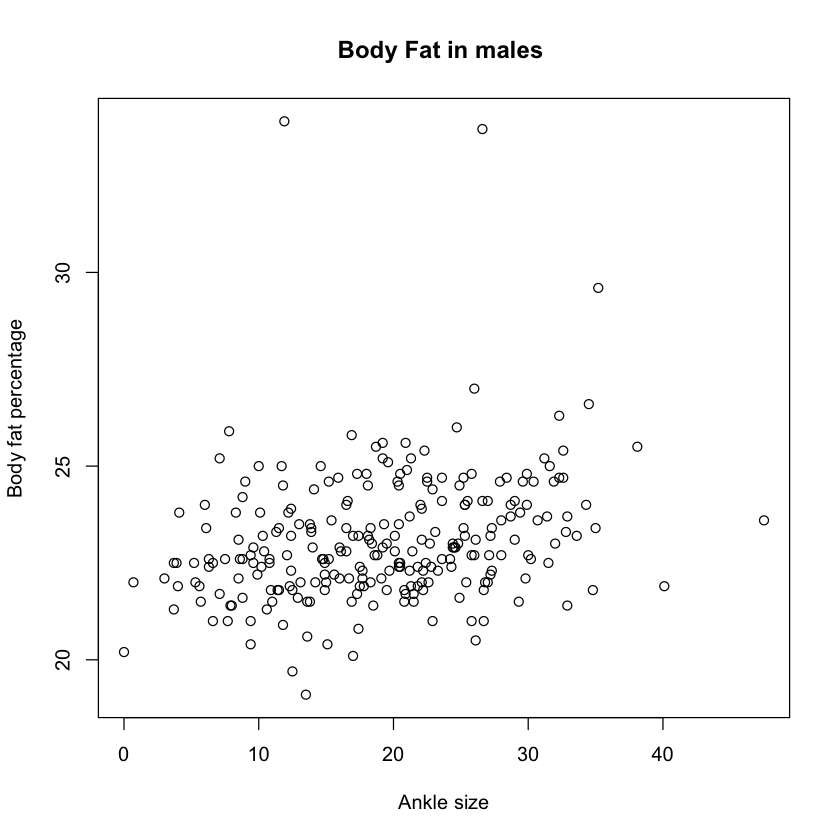

In [77]:
plot(dataset$PctBodyFat, dataset$Ankle, main="Body Fat in males ", xlab="Ankle size", ylab='Body fat percentage')

In [ ]:
# the graph shows a positive correlation with several significant outliers, the p values also agree ankle size is correlated with percentage bodyfat

In [ ]:
# Biceps

In [78]:
fitted_model_biceps <- lm(PctBodyFat ~ Biceps, dataset)

In [79]:
anova(fitted_model_biceps)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Biceps,1,4277.257,4277.25659,80.38908,7.388141e-17
Residuals,250,13301.733,53.20693,NA,NA


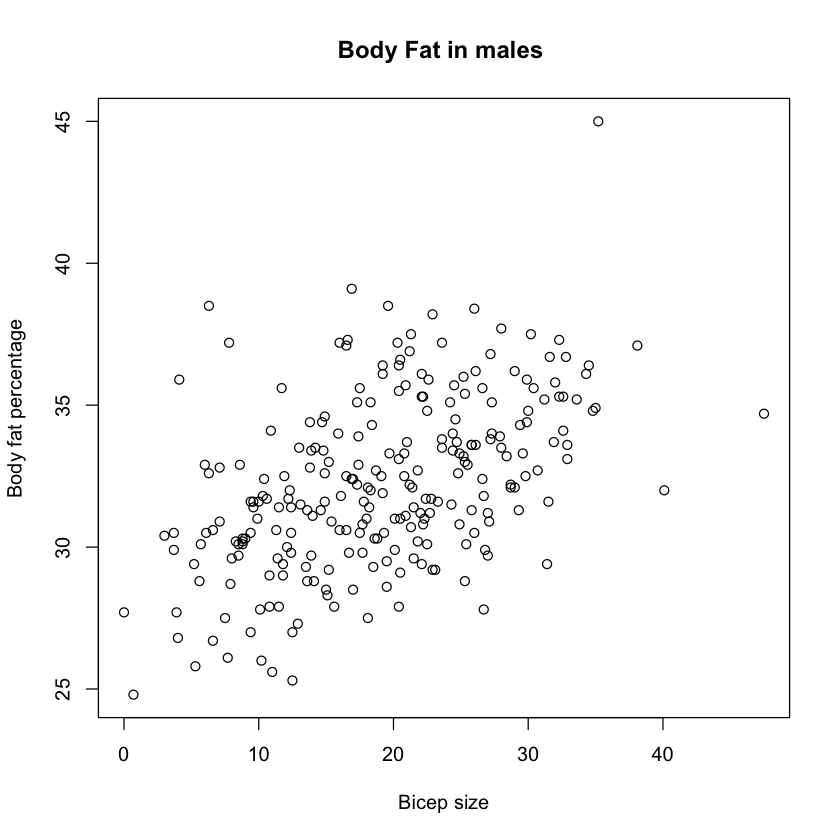

In [80]:
plot(dataset$PctBodyFat, dataset$Biceps, main="Body Fat in males ", xlab="Bicep size", ylab='Body fat percentage')

In [ ]:
# the Graph and p-values show there is a positive correlation between bicep size and percentage bodyfat

In [82]:
# Forearm

In [83]:
fitted_model_forearm <- lm(PctBodyFat ~ Forearm, dataset)

In [84]:
anova(fitted_model_forearm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Forearm,1,2295.825,2295.82475,37.5548,3.43703e-09
Residuals,250,15283.165,61.13266,NA,NA


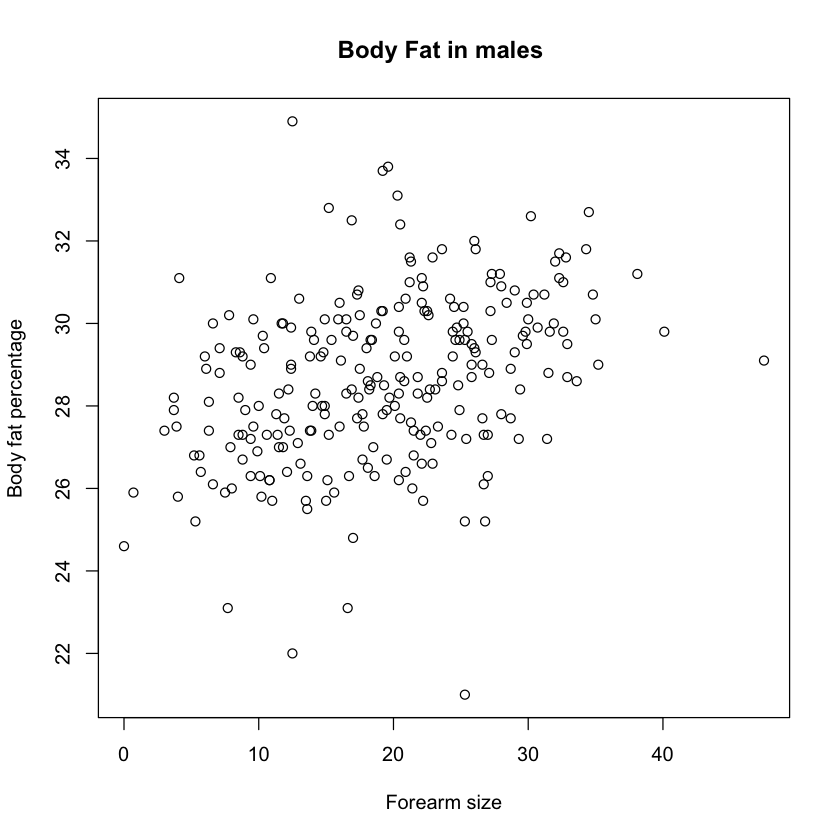

In [85]:
plot(dataset$PctBodyFat, dataset$Forearm, main="Body Fat in males ", xlab="Forearm size", ylab='Body fat percentage')

In [ ]:
# The graph shows a positive correlation between forearm size and bodyfat percentage

In [ ]:
# Wrist

In [86]:
fitted_model_wrist <- lm(PctBodyFat ~ Wrist, dataset)

In [87]:
anova(fitted_model_wrist)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Wrist,1,2111.485,2111.48519,34.12776,1.600325e-08
Residuals,250,15467.505,61.87002,NA,NA


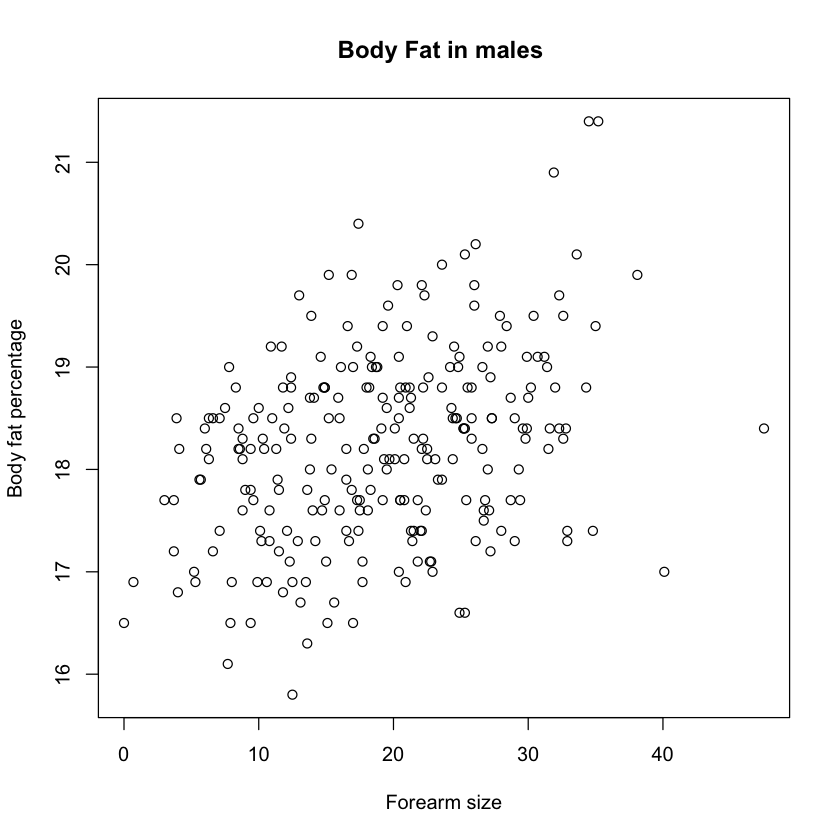

In [88]:
plot(dataset$PctBodyFat, dataset$Wrist, main="Body Fat in males ", xlab="Forearm size", ylab='Body fat percentage')

In [ ]:
# TODO: cut down on code, reusable function

In [95]:
regression_analysis <- function(variable) {
    fitted_model<- lm(PctBodyFat ~ variable, dataset)
    anova(fitted_model)
    plot(dataset$PctBodyFat, dataset$variable, main="Body Fat in males ", xlab=variable + " size", ylab='Body fat percentage')
}

In [96]:
for (variable in variables) {
    regression_analysis(variable)
}

ERROR: Error in model.frame.default(formula = PctBodyFat ~ variable, data = dataset, : variable lengths differ (found for 'variable')


In [61]:
# TODO: run a multiple linear regression and then remove the insignificant ones one by one, 
# re running the analysis after each removal 
# As the p values will change, terms may interract with other terms and be colinear